In [1]:
%pylab inline
import scipy.optimize

Populating the interactive namespace from numpy and matplotlib




## Task-1
Write a function that will take as input the following: 
1. parameter value $\alpha$
1. starting value for $x$
1. number of iterations to run

Tasks:
1. Task is to plot the $n$ vs. $x_n$, where $x_n=f(x_{n-1})$ and $x_0=x$.
1. For a fixed $\alpha$ and do the above plot for various $0\le x_0 \le 1$. 
1. Repeat above steps for the following values of $\alpha$: 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.25, 3.5
1. Comment


In [2]:
def calculate(x0,alpha):
    return alpha*(x0)*(1-x0)

def task1(x0, alpha, n_iter):
    l1 = [x0]
    for i in range(n_iter):
        t = calculate(l1[-1], alpha)
        l1.append(t)
    return l1

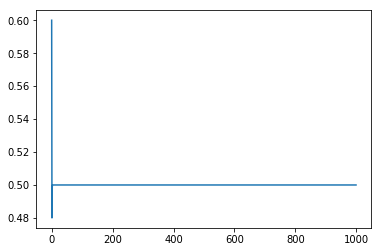

In [3]:
# Task is to plot the  𝑛  vs.  𝑥𝑛 , where  𝑥𝑛=𝑓(𝑥𝑛−1)  and  𝑥0=𝑥
n_vs_Xn = []
x0 = 0.6
alpha = 2
for n in range(1000):
    temp = task1(x0, alpha, n)
    n_vs_Xn.append(temp[-1])
plot(n_vs_Xn,"-")

Text(0,0.5,'f(x) -->')

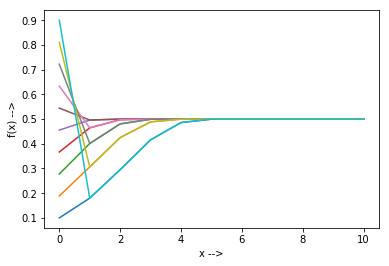

In [4]:
# For a fixed 𝛼 and do the above plot for various  0≤𝑥0≤1
xv = linspace(0.1,0.9,10)
n_iter = 10
alpha = 2
for x in xv:
    plot(task1(x, alpha, n_iter), "-", label = str(x))
xlabel("x -->")
ylabel("f(x) -->")


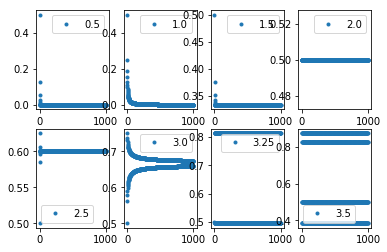

In [5]:
# Repeat above steps for the following values of  𝛼 : 
alphas = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.25, 3.5]
x0 = 0.5
i = 1
for alpha in alphas:
    subplot(2, 4, i)
    i += 1
    l1 = task1(x0, alpha, 1000)
    plot(l1 ,".", label = str(alpha))
    legend()

****
<a id='lesson-2'></a>
# Lesson-2: Logistic Map
****

## Map:
Map is a mathematical construct that takes an object and returns another object of same type. Usually, the map is iterated multiple times to test for reaching a 'constant' value i.e. steady state

Example: the operation of a map $f$ may written as: <br>
  $x_1=f(x_0)$ <br>
where the map $f$ transform the input $x_0$ to its new value $x_1$.

## Logistical map
Logistic map is a quadratic map; i.e. $f(x)$ is a quadratic ploynomial. 
It shows a particularly interesting phenomena of 'deterministic chaos' i.e. a deterministic map showing apparently random behaviour.  Logistic map has a single parameter, named $\alpha$, and is given by: <br>
$f(x)=\alpha x(1-x)$<br>
When $0\le \alpha \le 4$, the map takes an input $0\le x \le 1$ to give an output in the same range. For a particular value of the parameter $\alpha$, we want to find the behaviour of the map. For such systems, plot of $x_{n}$ vs $x_{n+1}$ is called phase plot and is a important tool for visualising and analysing such systems. 

We will explore this in this tutorial using phase plots.

You can find good detail on Logistic Map at: https://en.wikipedia.org/wiki/Logistic_map


## Task-2
1. Write a function that will take values for $x$, $\alpha$ and the number of steps and plot the Phase Plot for these steps. Note fixed points are given by $f(x) = x $
2. Use `scipy.optimizie.fixed_point` to find the fixed points  for given $\alpha$

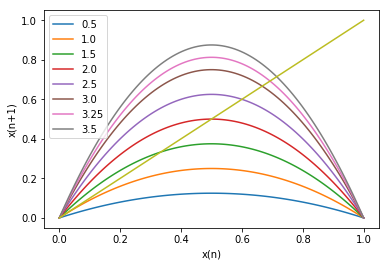

In [6]:
# plot of  𝑥𝑛  vs  𝑥𝑛+1

xv = linspace(0,1,100)
av = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.25, 3.5]
for a in av:
    plot(xv, calculate(xv,a), label=str(a))
plot([0,1],[0,1]) #plot takes two lists [x1,x2..],[y1,y2..]
xlabel("x(n)")
ylabel("x(n+1)")
legend()


## Task-3
Write a function, for a particular value of $\alpha$, to determine steady states and cycles (lets denote these values as $x^*(\alpha)$. For this we have to consider $f(x)$, $f(f(x))=f^2(x)$, $f^3(x)$,...,$f^n(x)$ and find fixed points of $f^n(x)$.

### Strategy to solve this task: to find the steady-state or cycle for a given $\alpha$
1. Find roots of $f^{(n)}-x=0$, where $f^{(n)}$ is the $n^{th}$ iteration of the map; i.e. $f^{(3)}(x)=f(f(f(x)))$
2. Check the stability of the roots. 
1. If all roots are unstable, then increase n by 1 and goto step 1
1. If even one root is stable, then we have found the steady-state/cycle.

Alternatively: 
$ \frac{d}{dx} f^{(n)}(x) = \frac{df(x_{n-1})}{dx}  \frac{d}{dx} f^{(n-1)}(x)  = \left[\alpha (1-2 x_{n-1})\right] \frac{d}{dx} f^{(n-1)}(x_{n-1}) $, which is a recursive formula for the derivative!

\begin{eqnarray}
\text{ Denote } x_n &= f^{(n)}(x) \\
\frac{d}{dx} f^{(n)}(x) & = \frac{d}{dx} x_n = \frac{d}{dx} f(x_{(n-1)}) =
                     \left[\alpha (1-2 x_{(n-1)})\right] \frac{d}{dx} x_{(n-1)} \\
 \text{ with } x_0 = x \implies \frac{d}{dx} x_0 = 1
\end{eqnarray}

$$ \frac{d}{dx} f^{(n)}(x)  = \frac{d}{dx} x_n = \frac{d}{dx} f(x_{(n-1)}) = f^\prime(x_{(n-1)}) \frac{d}{dx} x_{(n-1)} \text{ where }f^\prime(x)=\alpha (1-2x) \text{ and }\frac{d}{dx}x_0 = 1$$

So that $$\frac{d}{dx} f^{(n)}(x) = f^\prime(x_{n-1})~f^\prime(x_{n-2})~\cdots f^\prime(x_{2})~ f^\prime(x_{1})~f^\prime(x_0)\text{ where }x_0=x\text{ and }x_n=f^{(n)}(x_0)$$
and use `scipy.optimize.fixed_point`


In [7]:
def det_steady(alpha):
    x0 = [0.1]
    out = scipy.optimize.fixed_point(calculate, x0, args=(alpha,), xtol= (1e-04), maxiter=1000)
    return out[0]

print(det_steady(2))

0.0


## Task-4
Plot $\alpha$ vs $x^*(\alpha)$. Comment.


## Task-5
Find the ratio between two consequtive bifurcations.

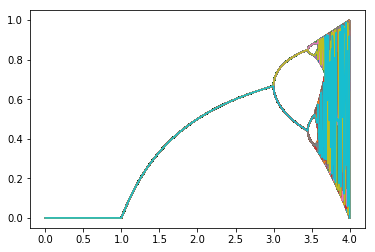

In [8]:
# Task4

finallist = []
alphav = linspace(0,4,900)
firstx = 0.5
for alpha in alphav:
    templist = task1(firstx,alpha,1800)
    finallist.append(templist[-900:])
plot(alphav, finallist,"-")

In [9]:
import math as mt
def newfunc(a,b,d):
    return mt.fabs(a-b)<d
def std(k):
    x=0.05
    c=1000
    n=10000
    t=[]
    for p in range(0,n):
        x=calculate(x,k)
        if p>=(n-c):
            r=0
            if len(t)==0:
                t.append(x)
            else:
                for o in t:
                    if(newfunc(o,x,0.00001)):
                        r=1
                if r==0:
                    t.append(round(x,5))
    return t
std(3.5)

k=len(std(0.01))
p=0
b=[]
a=2.0
while(a<4):
    l=len(std(a))
    if p>3:
        break
    if l>k:
        b.append(round(a,5))
        p+=1
    k=l
    a+=0.01
print(b)
f=(b[1]-b[0])/(b[2]-b[1])
print(f)

[3.0, 3.45, 3.55, 3.57]
4.500000000000018
